**1. Mount Directory and Check for Files**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os

path = '/content/drive/MyDrive/Kaggle/chest_xray'

# List contents of directory
if os.path.exists(path):
    print(f"Contents of '{path}':")
    for item in os.listdir(path):
        print(item)
else:
    print(f"Directory not found: '{path}'")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.1 Display Random Image from test folder**

Displaying random normal image: /content/drive/MyDrive/Kaggle/chest_xray/test/NORMAL/NORMAL2-IM-0145-0001.jpeg


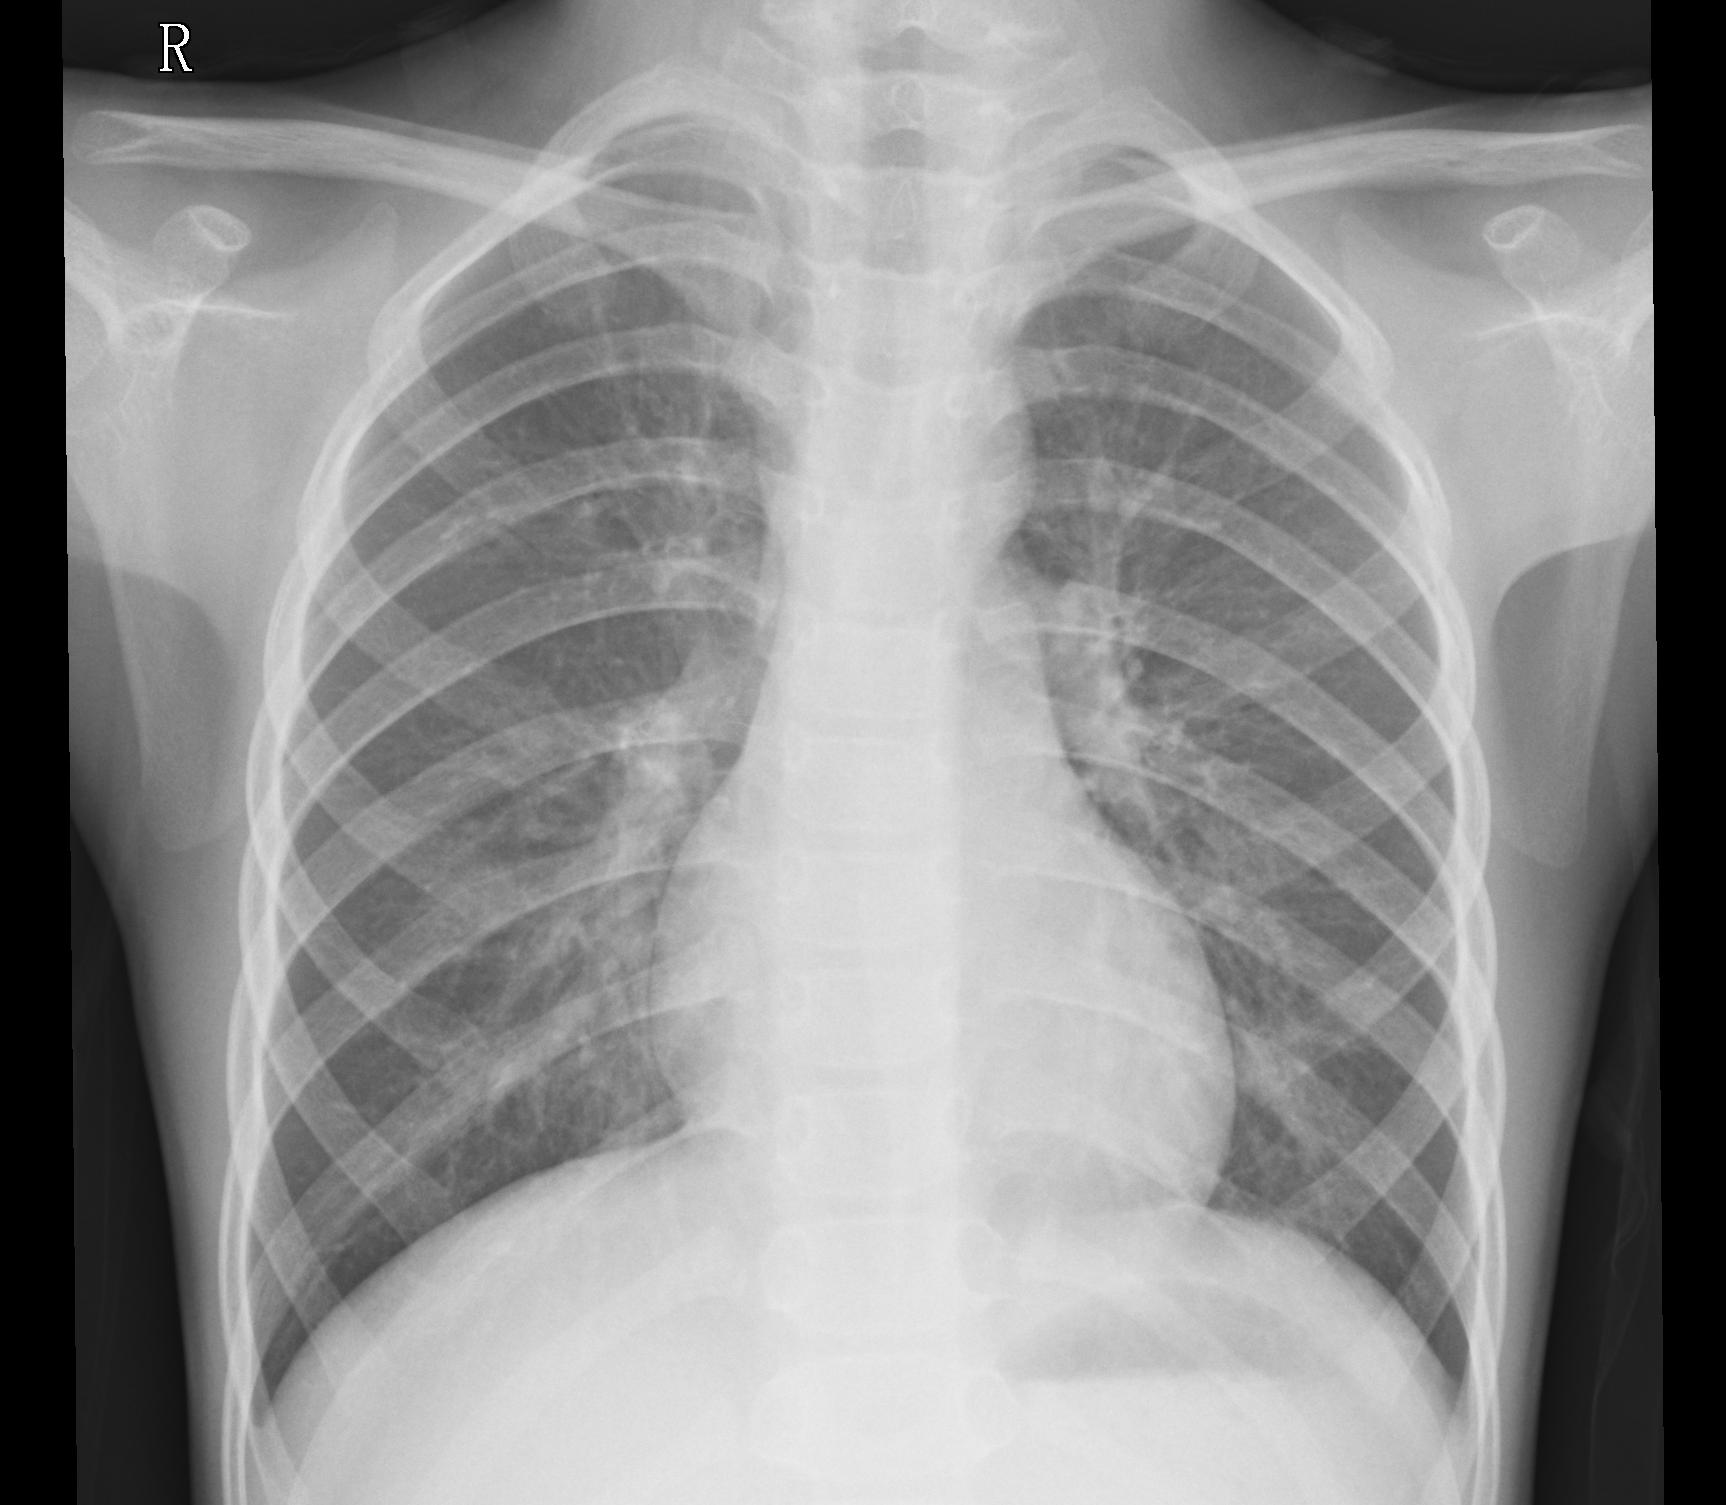

In [25]:
import random
from IPython.display import display, Image
import os

test_path = os.path.join(path, 'test')
test_normal_path = os.path.join(test_path, 'NORMAL')

# Get list of image files from the Normal subdirectory
normal_images = [os.path.join(test_normal_path, f) for f in os.listdir(test_normal_path) if f.endswith('.jpeg')]

if normal_images:
    random_image_path = random.choice(normal_images)
    print(f"Displaying random normal image: {random_image_path}")
    display(Image(filename=random_image_path))
else:
    print("No normal image files found in the test directory.")

**1.2 Display amount of images in each folder**

In [26]:
import os

test_path = os.path.join(path, 'test')
test_normal_path = os.path.join(test_path, 'NORMAL')
test_pneumonia_path = os.path.join(test_path, 'PNEUMONIA')

if os.path.exists(test_normal_path):
    normal_count = len([f for f in os.listdir(test_normal_path) if f.endswith('.jpeg')])
    print(f"Number of images in NORMAL folder: {normal_count}")
else:
    print(f"NORMAL folder not found: {test_normal_path}")

if os.path.exists(test_pneumonia_path):
    pneumonia_count = len([f for f in os.listdir(test_pneumonia_path) if f.endswith('.jpeg')])
    print(f"Number of images in PNEUMONIA folder: {pneumonia_count}")
else:
    print(f"PNEUMONIA folder not found: {test_pneumonia_path}")

Number of images in NORMAL folder: 234
Number of images in PNEUMONIA folder: 390


## Define image parameters

### Subtask:
Define the image size and batch size for the CNN model.


**Reasoning**:
Define the image size and batch size variables as specified in the instructions.



In [27]:
image_size = (150, 150)
batch_size = 32

print(f"Image size: {image_size}")
print(f"Batch size: {batch_size}")

Image size: (150, 150)
Batch size: 32


## Create data generators

### Subtask:
Use Keras `ImageDataGenerator` to load, preprocess, and augment the images from the training, validation, and test directories.


**Reasoning**:
Import the necessary class and create ImageDataGenerator instances for training, validation, and test datasets with appropriate parameters as per the instructions.



In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create ImageDataGenerator for validation and test data with only rescaling
val_test_datagen = ImageDataGenerator(rescale=1./255)

## Prepare data sets

### Subtask:
Create the training, validation, and test data sets using the data generators.


**Reasoning**:
Define the paths to the training, validation, and test directories and create the data generators using the defined paths and parameters.



In [29]:
import os

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'val')
test_dir = os.path.join(path, 'test')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Visualize sample images

### Subtask:
Display a few sample images from the training set to verify the data loading and preprocessing.


**Reasoning**:
Retrieve a batch of images and labels from the train_generator and display a few samples to verify the data loading and preprocessing.



**Reasoning**:
The `next()` method is deprecated for `DirectoryIterator`. Use `__next__()` instead to retrieve a batch of images and labels from the `train_generator` and display a few samples.



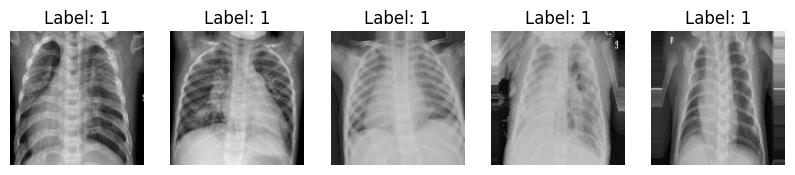

In [31]:
import matplotlib.pyplot as plt

# Retrieve one batch of images and labels
images, labels = train_generator.__next__()

# Display a few images
num_images_to_display = 5

plt.figure(figsize=(10, 10))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis('off')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The image size was set to (150, 150) and the batch size to 32 for the CNN model.
*   `ImageDataGenerator` instances were created: `train_datagen` with augmentation (rescaling, shear, zoom, horizontal flip) and `val_test_datagen` with only rescaling.
*   Data generators (`train_generator`, `validation_generator`, `test_generator`) were created from the specified directories, successfully identifying 5216 images in the training set, 16 in the validation set, and 624 in the test set, all belonging to 2 classes.
*   Sample images from the training set were successfully displayed, verifying the data loading and preprocessing steps.

### Insights or Next Steps

*   The data is prepared and ready to be used for training a simple CNN model for image classification.
*   The class distribution across the training, validation, and test sets should be checked to ensure it is balanced, especially given the small size of the validation set (16 images).


# Task
Model a simple CNN for image classification based on existing code, compile, train, evaluate and visualize the results.

## Define cnn model

### Subtask:
Define the architecture of a simple Convolutional Neural Network using Keras Sequential API.


**Reasoning**:
Import necessary Keras modules and define the CNN model architecture as instructed.



In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

## Compile the model

### Subtask:
Compile the CNN model with an appropriate optimizer, loss function, and metrics.


**Reasoning**:
Import the Adam optimizer and compile the model as specified in the instructions.



In [39]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │     1,327,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,346,529 (5.14 MB)

 Trainable params: 1,346,529 (5.14 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

### Subtask:
Train the CNN model using the prepared training and validation data generators.


**Reasoning**:
Train the compiled CNN model using the prepared training and validation data generators for a specified number of epochs.



In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=32, # train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=None
)